# Welcome to HW2

In this assignment you will be implementing a neural network in order to perform regression on the Airfoil Self-Noise data set. Remember to restart and run all cells before submission. Points will be deducted if you do not do this. When you are ready to submit, you can convert your notebook to a PDF file by printing the page either with `ctrl + p` or `command + p` and then saving as p1.pdf.

## The imports and helper functions should not be modified in any way.

In [9]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [10]:
def evaluate(model, test_data):
    '''
        Do not modify this code.
    '''
    test_loader = DataLoader(Dataset(test_data), batch_size=1)
    loss_fn = torch.nn.MSELoss()
    with torch.no_grad():
        total_loss = 0
        for x, y in test_loader:
            pred = model(x)
            total_loss += loss_fn(pred, y).item()
    print("TOTAL EVALUATION LOSS: {0:.5f}".format(total_loss))

In [11]:
def plot_training_curves(train_loss, val_loss, loss_fn_name, reduction):
    '''
        Do not modify this code.
    '''
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(train_loss, label="Train Loss")
    ax.plot(val_loss, label="Validation Loss")
    ax.legend(loc='best')
    ax.set_title("Loss During Training", fontsize=16)
    ax.set_xlabel("Epochs", fontsize=14)
    ax.set_ylabel("Loss: {}(reduction={})".format(loss_fn_name, reduction), fontsize=14)
    plt.savefig("./example_loss.pdf")
    plt.show()

## a) Implement your dataset object.

Do not modify the function definitions. Please note that the first five columns of the airfoil data are features and the last column is the target. Your dataset should have one attribute for the features, one attribute for the targets, and should return the specified features and target in `__getitem__()` as separate values.

In [12]:
class Dataset(torch.utils.data.Dataset):
    """Create your dataset here."""

    def __init__(self, airfoil_data):
        """
            Initialize your Dataset object with features and labels
        """
        ### Define your features and labels here
        self.data = np.load(airfoil_data)
        self.features = self.data[:,:-1]
        self.labels = self.data[:,-1]
        self.labels = self.labels.reshape(self.labels.shape[0], -1)
        
    def __len__(self):
        ### Define the length of your data set
        return len(self.labels)

    def __getitem__(self, idx):
        ### Return the features and labels of your data for a given index
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        feature = self.features[idx]
        label = self.labels[idx]

        return feature, label

## b) Implement the model architecture and `forward` function.

Do not modify the function definitions. You will need to define input, hidden, and output layers, as well as the activation function.

In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dimension=5, output_dimension=1, 
                 hidden=32, activation=nn.ReLU()):
        super(NeuralNetwork, self).__init__()
        '''
            Implement your neural network here. 
            You will need to add layers and an activation function.
        '''
        ### Define your input, hidden and output layers here
        self.fc1 = nn.Linear(input_dimension, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 30)
        self.fc4 = nn.Linear(30, output_dimension)
        ### Set your activation function here
        self.relu = nn.ReLU()

    def forward(self, x):
        '''
            Implement the forward function using the layers 
            and activation function you defined above.
        '''
        ### Call your hidden layers and activation function
        ### to do the forward pass through your network.
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)        
        return x

## c, d) Define hyperparameters and implement the training loop.

You will need to choose your loss function, number of epochs, optimizer learning rate, optimizer weight decay, and batch size for part (c). You will need to set up the DataLoader, implement the forward pass, and implement the backpropagation update.

In [28]:
def train(model, train_data, validation_data):

    ###
    #  Modify these parameters
    ###
    loss_fn = nn.MSELoss()
    epochs = 2200
    learning_rate = 0.002
    weight_decay = 0.0001
    batch_size = 20

    # Set up data
    train_loader = DataLoader(Dataset(train_data),
                              batch_size=batch_size, shuffle=True, num_workers=0)
    validation_loader = DataLoader(Dataset(validation_data),
                                   batch_size=batch_size, shuffle=True, num_workers=0)

    # The Adam optimizer is recommended for this assignment.
    optimizer = torch.optim.Adam(model.parameters(), 
                                 lr=learning_rate, weight_decay=weight_decay)

    train_losses, val_losses = [], []
    for ep in tqdm(range(epochs)):
        train_loss = 0
        for x, y in train_loader:
            optimizer.zero_grad()
            x = x
            y = y.reshape(y.shape[0], -1)

            # Make prediction with your model
            pred = model(x)

            # Calculate loss
            loss = loss_fn(pred, y)
            train_loss += loss.item()

            # Backpropagate loss through the network and update parameters
            loss.backward()
            optimizer.step()
        train_losses.append(train_loss)

        val_loss = 0
        with torch.no_grad():
            for x, y in validation_loader:
                x = x
                y = y #.reshape(y.shape[0], -1)
                # Make prediction with model.forward()
                pred = model(x)

                # Calculate loss
                loss = loss_fn(pred, y)
                val_loss += loss.item()
        val_losses.append(val_loss)
        # Feel free to modify how frequently training progress is printed
        if(ep%100 == 0):
            print("Train Loss: {0:.4f}\tValidation Loss: {1:.4f}"
                  .format(train_loss, val_loss))

        # Hold on to losses for easy saving and plotting
    
    # I chose to save losses and model for all 4 configurations for part f)
    # Save your losses as .npy files
    np.save("./train_losses_1.npy", train_losses)
    np.save("./val_losses_1.npy", val_losses)

    # Save the model as ./p1_model_i.pt
    torch.save(model.state_dict(), "./p1_model_1.pt")
    return model

## e) Load your data, then train and evaluate your model before plotting the training curves.

  0%|▏                                       | 8/2200 [00:00<01:00, 36.25it/s]

Train Loss: 34.7787	Validation Loss: 6.8329


  5%|█▊                                    | 106/2200 [00:02<00:54, 38.53it/s]

Train Loss: 2.3798	Validation Loss: 1.5372


 10%|███▌                                  | 209/2200 [00:05<00:49, 40.08it/s]

Train Loss: 2.3302	Validation Loss: 1.2577


 14%|█████▎                                | 308/2200 [00:07<00:47, 39.93it/s]

Train Loss: 1.3640	Validation Loss: 1.2756


 19%|███████                               | 408/2200 [00:10<00:47, 37.99it/s]

Train Loss: 1.1287	Validation Loss: 1.1956


 23%|████████▊                             | 508/2200 [00:13<00:48, 35.20it/s]

Train Loss: 0.9196	Validation Loss: 1.1801


 28%|██████████▍                           | 606/2200 [00:15<00:39, 40.09it/s]

Train Loss: 0.6559	Validation Loss: 1.1109


 32%|████████████▏                         | 705/2200 [00:18<00:38, 38.73it/s]

Train Loss: 0.9468	Validation Loss: 1.0794


 36%|█████████████▊                        | 802/2200 [00:21<01:00, 23.06it/s]

Train Loss: 0.6014	Validation Loss: 1.0735


 41%|███████████████▋                      | 905/2200 [00:25<00:32, 39.50it/s]

Train Loss: 0.4966	Validation Loss: 0.9986


 46%|████████████████▉                    | 1009/2200 [00:28<00:29, 39.94it/s]

Train Loss: 0.5149	Validation Loss: 0.9284


 50%|██████████████████▋                  | 1108/2200 [00:30<00:27, 40.09it/s]

Train Loss: 0.6414	Validation Loss: 0.9390


 55%|████████████████████▎                | 1205/2200 [00:37<00:25, 38.77it/s]

Train Loss: 0.7570	Validation Loss: 0.9735


 59%|█████████████████████▉               | 1307/2200 [00:39<00:22, 40.13it/s]

Train Loss: 0.5555	Validation Loss: 1.0353


 64%|███████████████████████▋             | 1408/2200 [00:42<00:19, 40.48it/s]

Train Loss: 0.4137	Validation Loss: 1.0986


 69%|█████████████████████████▎           | 1508/2200 [00:44<00:17, 40.39it/s]

Train Loss: 0.5669	Validation Loss: 1.0674


 73%|███████████████████████████          | 1609/2200 [00:47<00:14, 40.49it/s]

Train Loss: 0.4987	Validation Loss: 0.9640


 78%|████████████████████████████▋        | 1705/2200 [00:49<00:12, 40.47it/s]

Train Loss: 0.3319	Validation Loss: 0.9686


 82%|██████████████████████████████▎      | 1806/2200 [00:52<00:09, 40.15it/s]

Train Loss: 0.3584	Validation Loss: 1.0535


 87%|████████████████████████████████     | 1907/2200 [00:54<00:07, 40.33it/s]

Train Loss: 0.5268	Validation Loss: 1.0421


 91%|█████████████████████████████████▋   | 2005/2200 [00:57<00:04, 40.38it/s]

Train Loss: 0.4109	Validation Loss: 1.0375


 96%|███████████████████████████████████▍ | 2106/2200 [01:00<00:02, 40.39it/s]

Train Loss: 0.3404	Validation Loss: 0.9132


100%|█████████████████████████████████████| 2200/2200 [01:02<00:00, 35.25it/s]


TOTAL EVALUATION LOSS: 12.57257


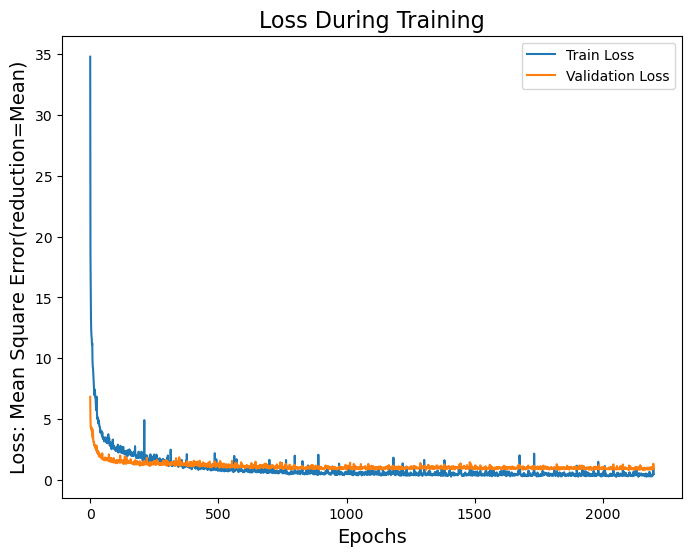

In [29]:
if __name__ == '__main__':
    torch.manual_seed(137)
    
    # Load in the provided data
    train_data = 'train_data.npy'
    validation_data = 'validation_data.npy'
    test_data = 'test_data.npy'

    model = NeuralNetwork().double()
    
    model = train(model, train_data, validation_data)
    evaluate(model, test_data)

    # Load your training data and call the provided plot function. 
    # Loss function and reduction scheme are required for the plotting function.
    
    train_loss = np.load('train_losses_1.npy')
    val_loss = np.load('val_losses_1.npy')
    reduction = 'Mean'
    loss_fn_name = 'Mean Square Error'
    plot_training_curves(train_loss, val_loss, loss_fn_name, reduction)

## f) Run 4 different hyperparameter combinations and explain the differences in results


Model 1
lr = 0.002 epochs = 2200 weight decay = 0.0001 batch size = 20


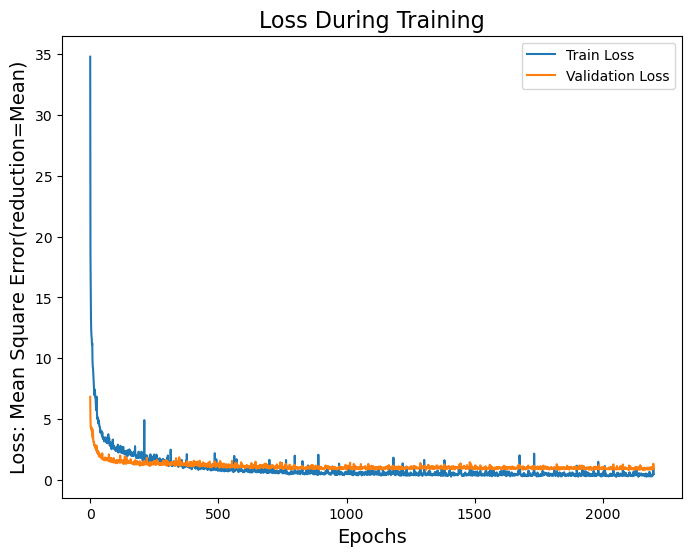

TOTAL EVALUATION LOSS: 12.57257

Model 2
lr = 0.002 epochs = 2200 weight decay = 0.1 batch size = 20


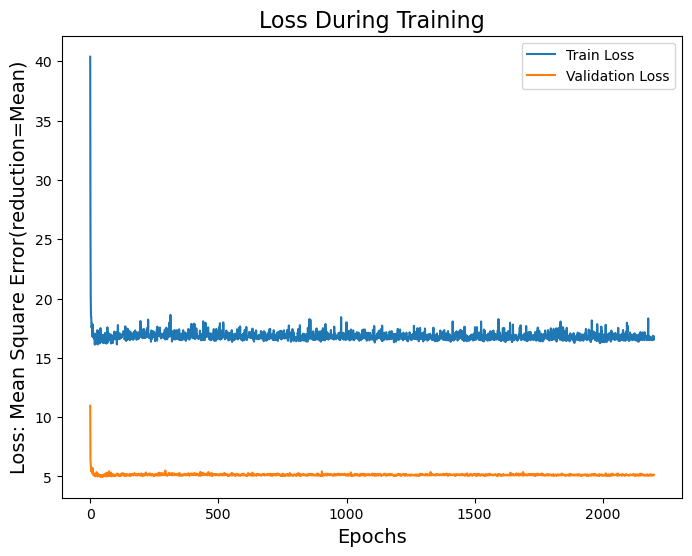

TOTAL EVALUATION LOSS: 96.81435

Model 3
lr = 0.01 epochs = 2200 weight decay = 0.0001 batch size = 20


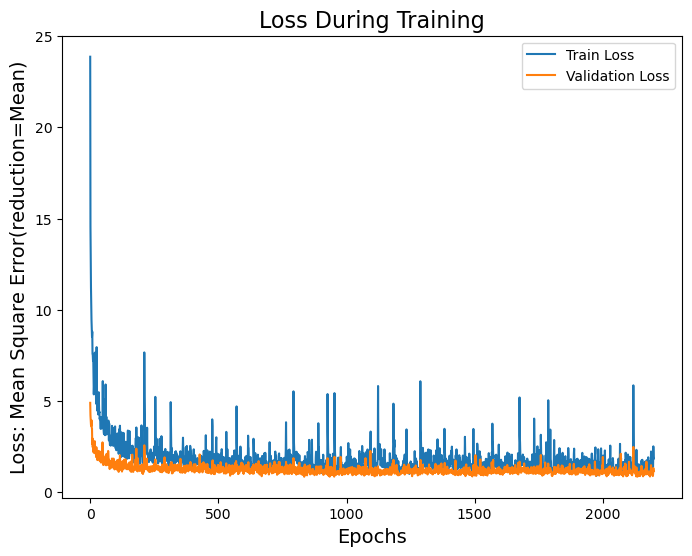

TOTAL EVALUATION LOSS: 20.72014

Model 4
lr = 0.002 epochs = 2200 weight decay = 0.0001 batch size = 32


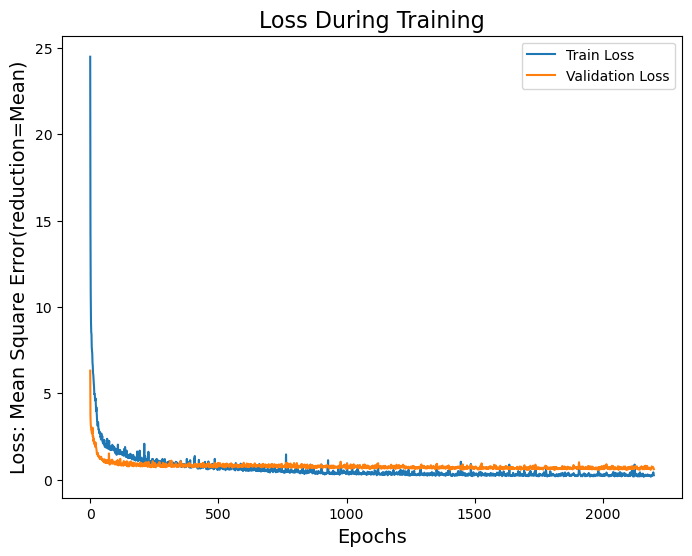

TOTAL EVALUATION LOSS: 13.38539


In [27]:
model = NeuralNetwork().double()
lr = [0.002, 0.002, 0.01, 0.002]
epochs = 2200
decay = [0.0001, 0.1, 0.0001, 0.0001]
batch = [20, 20, 20, 32]
# load the "state_dict" from file into the model
for i in range(4):
    model.load_state_dict(torch.load(f"p1_model_{i+1}.pt"))
    train_loss = np.load(f'train_losses_{i+1}.npy')
    val_loss = np.load(f'val_losses_{i+1}.npy')
    reduction = 'Mean'
    loss_fn_name = 'Mean Square Error'
    print(f'\nModel {i+1}')
    print(f"lr = {lr[i]} epochs = {epochs} weight decay = {decay[i]} batch size = {batch[i]}")
    plot_training_curves(train_loss, val_loss, loss_fn_name, reduction)
    evaluate(model, test_data)

### Explanation

The first model was the best performing, with a loss of 12.57. It was at a sort of sweet spot between the hyperparameters. The loss still had some peaks during training that indicate that the model was converging, but still overshooting the minimum a bit, but overall it managed to get the lowest test loss.

The second model has a much larger weight decay value than model 1. This means that the L2 regularization is much more significant, limiting the values that the weights can get to. Because of this, the weights can't get large enough to train the model effectively. This model fails to train and got the largest loss of all the tested configurations. The weight decay parameter is too large for this problem.

The third model has a larger learning rate than model 1. This learning rate of 0.01 is just barely too large for the model to fully converge at the minimum. The problem seems to have a very narrow minima and needs the gradient descent to be slow in order to avoid overshooting and oscillating at the edges of the minimum. It can be seen by all the peaks in the loss plot, it's very noisiy and unable to get as low as the first model.

The fourth model has a different batch size than the others. During testing I tried different batch sizes and found interesting that, even though this example has a similar loss plot (it's even smoother and goes lower than the first model), the test loss is slightly higher. Batch size has a similar effect to changing learning rate, since it affects how many iterations there are per epoch, or how much learning there is per epoch. A larger batch size means that the weights are updated based on more examples at a time. This helps because the learning is based off more of the data at each step, but it also means that there are less total steps. This is why it's smoother, but gets a larger test loss.

Overall, this problem seems to be very finnicky, very small changes in hyperparameters would have a big impact on loss, indicating that the problem probably has various local minima, a narrow minimum we are trying to get into, or a uneven path to the minimum, where the model can get easily stuck before converging at the lowest loss.